In [14]:

import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from scipy.signal import find_peaks
from datetime import datetime, timedelta
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import FixedLocator

# Set figure styling 
plt.rcParams['font.family'] = 'serif'
plt.rcParams["xtick.labelsize"] = 16
plt.rcParams["ytick.labelsize"] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["axes.titlesize"] = 16
plt.rcParams['axes.labelweight'] = 'bold'

# import seaborn as sns
# sns.set(style="whitegrid")  # Options: "darkgrid", "whitegrid", "ticks", etc.

In [15]:

# GPS to UTC time difference due to leap seconds
LEAP_SECONDS = 18  # GPS time is ahead of UTC by 18 seconds (as of 2024)



def gps_to_utc(gps_time):
    """
    Convert GPS time (seconds) to UTC time, accounting for 18 seconds leap second offset.
    Args:
        gps_time (int, float, or np.int64): GPS time in seconds
    Returns:
        datetime: Corresponding UTC time as a datetime object
    """
    gps_epoch = datetime(1980, 1, 6)
    gps_time = int(gps_time)  # Use float(gps_time) if fractional seconds are needed
    utc_time = gps_epoch + timedelta(seconds=gps_time - LEAP_SECONDS)
    return utc_time

In [16]:
# Create the output directory if it doesn't exist
outdir = "Plots"
os.makedirs(outdir, exist_ok=True)
directory = '/home/weizmann.kiendrebeogo/DeepClean/DeepClean_CIT/Injections/new_injection/CNR-version/special/Rework/BNS-range/data/layer_15-415'

# GPS to UTC time difference due to leap seconds
LEAP_SECONDS = 18  # GPS time is ahead of UTC by 18 seconds (as of 2024)



In [17]:
# each frequency band represent a layer,

band_freq =['142-162 Hz', '15-20 Hz', '33-39 Hz', '55-65 Hz', '75-80 Hz', '98-110 Hz', '137-139 Hz', '197-208 Hz',  '247-252 Hz', '295-305 Hz', '345-355 Hz', '355-367 Hz', '395-415 Hz'] 

In [18]:
# Dictionaries to store data for the plot
layer_data_org = {}
layer_data_cleaned = {}

# Read data from CSV files and compute means
for idx in range(0, 13):
    file_path = os.path.join(directory, f'BNS_inspiral_range_15-415_Hz_layer{idx}.csv')
    
    data = pd.read_csv(file_path)
    
    layer_num = idx + 1
    layer_data_org[layer_num] = data['BNS Inspiral Range ORG'].mean()
    layer_data_cleaned[layer_num] = data['BNS Inspiral Range DC'].mean()  # Assuming 'DC' is the cleaned data

# Ensure that both dictionaries have the same layers
common_layers = set(layer_data_org.keys()).intersection(set(layer_data_cleaned.keys()))
layers = sorted(common_layers)

print(layers)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [19]:
# Extract ranges for the layers
ranges_cleaned = [layer_data_cleaned[layer] for layer in layers]
ranges_org = [layer_data_org[layer] for layer in layers]

print("Range for Cleaned data :", ranges_cleaned)
print("\n")
print("range for ORG data:", ranges_org)

Range for Cleaned data : [52.11840916691841, 52.13001065603332, 52.41691835817061, 52.92528581851837, 53.029394434675616, 53.20454305445609, 53.227874102585666, 53.242604894573695, 53.24298572025691, 53.24128358950552, 53.247786556039145, 53.249133874914186, 53.25111224986491]


range for ORG data: [51.9581227893286, 51.9581227893286, 51.9581227893286, 51.9581227893286, 51.9581227893286, 51.9581227893286, 51.9581227893286, 51.9581227893286, 51.9581227893286, 51.9581227893286, 51.9581227893286, 51.9581227893286, 51.9581227893286]


In [20]:
# Calculate percentage improvement
percentage_improvement = ((np.array(ranges_cleaned) - np.array(ranges_org)) / np.array(ranges_org)) * 100
percentage_improvement

array([0.30849147, 0.33082001, 0.88301029, 1.86142797, 2.06179821,
       2.39889395, 2.44379751, 2.47214879, 2.47288174, 2.46960577,
       2.48212156, 2.48471464, 2.48852228])

In [21]:
# Add the  zeroth layer point on the x axis
layers = [0] + layers
print("layers with the zeroth layer point :", layers)

layers with the zeroth layer point : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [22]:
##  the zeroth layer point before any clean 
ranges_cleaned = [ranges_org[0]] + ranges_cleaned
print("Ranges cleaned :", ranges_cleaned)


Ranges cleaned : [51.9581227893286, 52.11840916691841, 52.13001065603332, 52.41691835817061, 52.92528581851837, 53.029394434675616, 53.20454305445609, 53.227874102585666, 53.242604894573695, 53.24298572025691, 53.24128358950552, 53.247786556039145, 53.249133874914186, 53.25111224986491]


In [23]:
for i in range(len(ranges_cleaned)): 
       if i +1 < len(ranges_cleaned):
            print(f"layer {i+1} {(ranges_cleaned[i+1] - ranges_cleaned[i] )}")

layer 1 0.1602863775898129
layer 2 0.011601489114909214
layer 3 0.28690770213729166
layer 4 0.5083674603477562
layer 5 0.10410861615724798
layer 6 0.17514861978047236
layer 7 0.023331048129577425
layer 8 0.014730791988029068
layer 9 0.0003808256832158463
layer 10 -0.0017021307513900297
layer 11 0.006502966533624033
layer 12 0.0013473188750410259
layer 13 0.00197837495072406


In [24]:
percentage = [0] + percentage_improvement.tolist()
percentage


[0,
 0.3084914715639674,
 0.3308200094173249,
 0.8830102863844098,
 1.8614279678872663,
 2.0617982094746514,
 2.3988939519260035,
 2.443797514404918,
 2.4721487926983183,
 2.4728817400466276,
 2.4696057734411916,
 2.482121557662248,
 2.484714643791445,
 2.488522277409668]

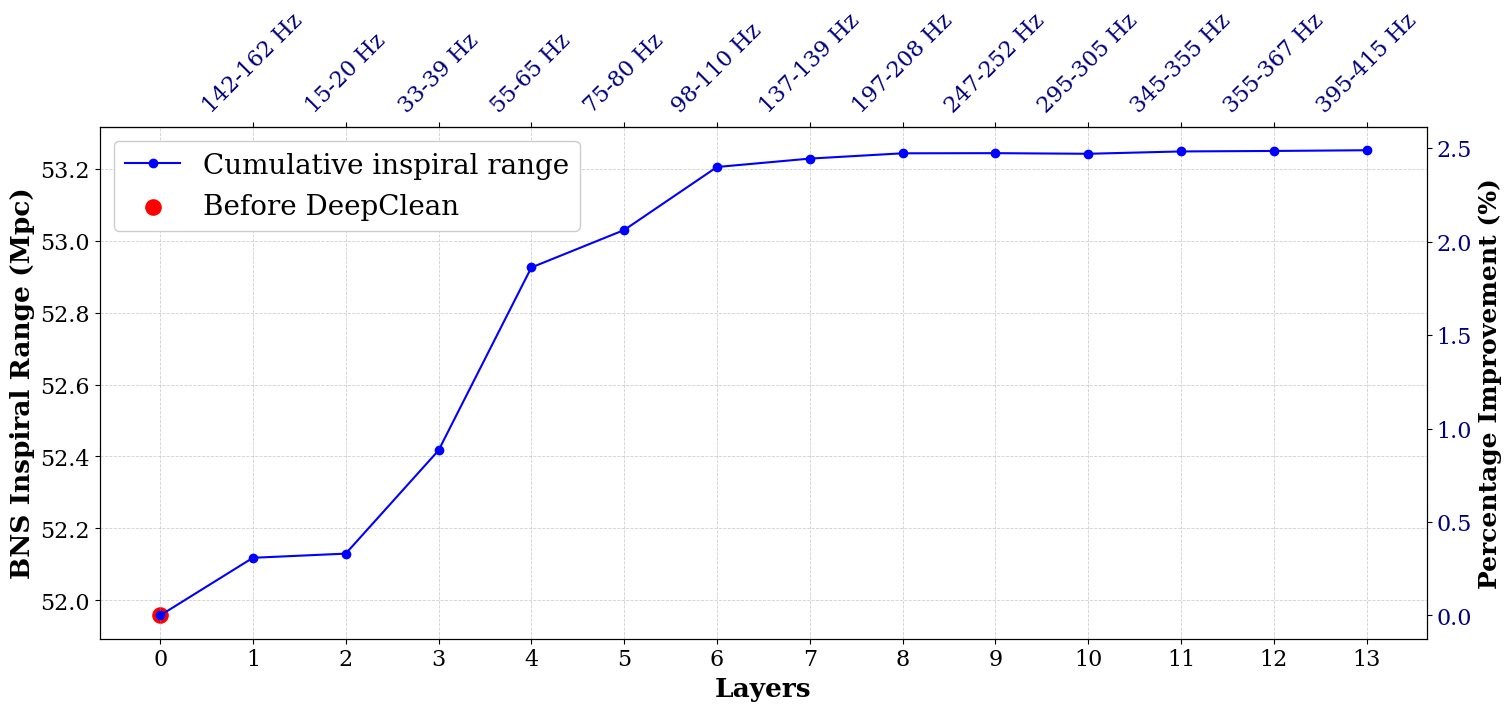

In [39]:
# Create the plot
fig, ax1 = plt.subplots(figsize=(15, 7), constrained_layout=True)
ax1.set_facecolor('white')

# Plot cleaned ranges on the primary y-axis
ax1.plot(
    layers, 
    ranges_cleaned, 
    marker='o', 
    linestyle='-', 
    color='blue', 
    label=r'Cumulative inspiral range'
)
ax1.scatter(
    layers[0], 
    ranges_cleaned[0], 
    color='red', 
    s=120,
    label='Before DeepClean'
)
ax1.set_xlabel('Layers', fontsize=19, fontweight='bold')
ax1.set_ylabel(r'BNS Inspiral Range (Mpc)', fontsize=19, fontweight='bold')
ax1.set_xticks(layers)
ax1.grid(True, which='both', linestyle='--', linewidth=0.6, alpha=0.6)

secondary_ax = ax1.secondary_xaxis('top')
secondary_ax.set_xticks(layers[1:])  # Skip the first layer since it has no frequency band
secondary_ax.set_xticklabels([f'{freq}' for freq in band_freq], rotation=45, fontsize=16, color='navy')

ax1.tick_params(axis='y', labelcolor='black')

# Create a secondary y-axis for percentage improvement
ax2 = ax1.twinx()
ax2.plot(
    layers, 
    percentage, 
    # marker='o', 
    linestyle='', 
    # color='', 
    # label='Percentage Improvement'
)
ax2.set_ylabel('Percentage Improvement (%)', fontsize=18, fontweight='bold', color='black')
ax2.tick_params(axis='y', labelcolor='navy')

# Combine legends from both axes
lines = ax1.get_lines()  + [ax1.collections[0]] 
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left', framealpha=1, fontsize=20)

# Save the plot
output_path = os.path.join(outdir, 'Cumulative_Inspiral_Range_Layers.pdf')
plt.savefig(output_path, bbox_inches='tight', dpi=800)

# Display the plot
plt.show()

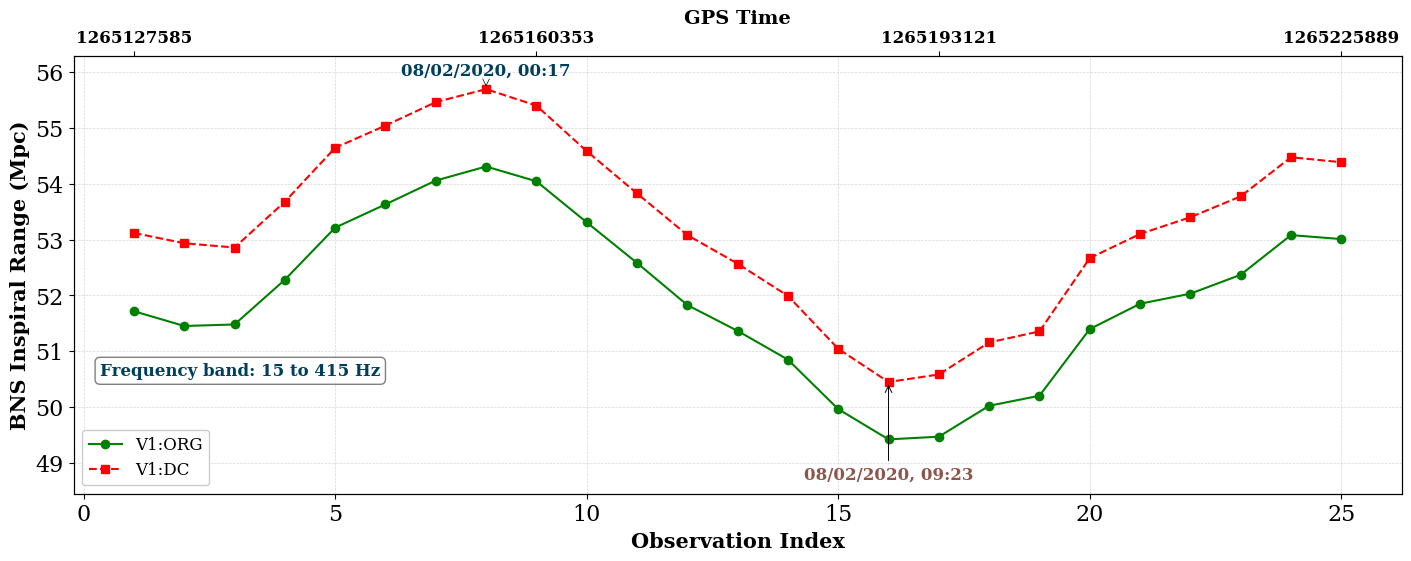

In [27]:
# Load the data

for freq in [ '15-415_Hz']: #'98-110_Hz', '197-208_Hz', '142-162_Hz',
    data = pd.read_csv(os.path.join(directory, f'BNS_inspiral_range_{freq}.csv'))

    data = data.sort_values(by='Start Time', ascending=True)
    data.reset_index(drop=True, inplace=True)

    # Convert GPS times to UTC
    data['UTC Time'] = data['Start Time'].apply(gps_to_utc)

    # Data for plotting
    bns_inspiral_range_org = data['BNS Inspiral Range ORG']
    bns_inspiral_range_dc = data['BNS Inspiral Range DC']
    observation_index = np.arange(1, len(data) + 1)  

    # Set min_time and max_time based on the first and last observations
    min_time = data['Start Time'].iloc[0]  # Start Time of the first observation
    max_time = data['Start Time'].iloc[-1]  # Start Time of the last observation
    # Revised Plotting Section


    ORG_COLOR = 'green' #'#bcbd22'  # Tab10 Olive
    DC_COLOR =  'red'#'#CC0000'   #Dark2 Purple

    PEAK_COLOR = '#003f5c'  # Dark Blue for peak annotations
    TROUGH_COLOR = '#8c564b'  # Brown for trough annotations
    
    fmin, fmax  = int(freq.split('-')[0]), int(freq.split('-')[-1].split('_')[0])

    # Create figure and primary axis
    fig, ax = plt.subplots(figsize=(14, 5.5), constrained_layout=True)
    ax.set_facecolor('white')  # Use white background for clarity

    # Plotting BNS Inspiral Range before and after Deep Cleaning
    ax.plot(observation_index, bns_inspiral_range_org, label='V1:ORG', 
            marker='o', linestyle='-', color=ORG_COLOR)
    ax.plot(observation_index, bns_inspiral_range_dc, label='V1:DC', 
            marker='s', linestyle='--', color=DC_COLOR)

    # Peak Detection
    peak_prominence = 2  # Adjust based on your data's characteristics
    peaks, properties = find_peaks(bns_inspiral_range_dc, prominence=peak_prominence)

    # Annotate each peak with its UTC time in bold font
    for peak in peaks:
        utc_time = data['UTC Time'].iloc[peak]
        formatted_time = utc_time.strftime("%d/%m/%Y, %H:%M")
        ax.annotate(
            formatted_time,
            (observation_index[peak], bns_inspiral_range_dc.iloc[peak]),
            textcoords="offset points",
            xytext=(0,10),
            ha='center',
            fontsize=12,
            fontweight='bold',
            color='#003f5c',
            arrowprops=dict(
                arrowstyle="->",
                color='black',
                lw=0.5
            )
        )

    # Trough Detection (Low Peaks)
    # Invert the data to find troughs
    inverted_bns_inspiral_range_dc = -bns_inspiral_range_dc

    # Define prominence for trough detection
    trough_prominence = 1  # Adjust based on your data's characteristics
    troughs, trough_properties = find_peaks(inverted_bns_inspiral_range_dc, prominence=trough_prominence)

    
    if fmin==15:
         offset_value = -70
    else:
        offset_value = -40
            
    # Annotate each trough with its UTC time in bold font
    for trough in troughs:
        utc_time = data['UTC Time'].iloc[trough]
        formatted_time = utc_time.strftime("%d/%m/%Y, %H:%M")
        ax.annotate(
            formatted_time,
            (observation_index[trough], bns_inspiral_range_dc.iloc[trough]),
            textcoords="offset points",
            xytext=(0, offset_value),  # Offset label below the trough
            ha='center',
            fontsize=12,
            fontweight='bold',
            color=TROUGH_COLOR,
            arrowprops=dict(
                arrowstyle="->",
                color='black',
                lw=0.7
            ))

    
    if fmin==15:
        # Add frequency band text with bold font in a textbox
        plt.text(0.02, 0.3, f'Frequency band: {fmin} to {fmax} Hz', 
                 transform=ax.transAxes, fontsize=12, color='#003f5c', fontweight='bold',
                 verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))


    else:# Add frequency band text with bold font in a textbox
	    plt.text(0.02, 0.38, f'Frequency band: {fmin} to {fmax} Hz', 
		     transform=ax.transAxes, fontsize=12, color='#003f5c', fontweight='bold',
		     verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

    # Labels and title
    ax.set_xlabel(r'Observation Index', fontsize=15, fontweight='bold')
    ax.set_ylabel(r'BNS Inspiral Range (Mpc)', fontsize=15, fontweight='bold')
    ax.legend(loc='lower left', framealpha=1, fontsize=12)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)

    # Add a secondary X-axis for GPS Time
    ax2 = ax.twiny()
    ax2.set_xlim(ax.get_xlim())  # Align the secondary axis with the primary axis

    # Define the number of GPS time labels
    num_labels = min(4, len(observation_index))  # Adjust based on data length
    tick_indices = np.linspace(1, len(observation_index), num=num_labels, dtype=int)
    tick_labels = [data['Start Time'].iloc[i - 1] for i in tick_indices]

    # Configure the secondary X-axis
    ax2.set_xticks(tick_indices)
    ax2.set_xticklabels(tick_labels, rotation=0, fontsize=12, fontweight='bold', color='black')
    ax2.set_xlabel('GPS Time', fontsize=14, fontweight='bold', color='black')

    #Adjust y-limits for better visualization
    if fmin==15:
        ax.set_ylim(np.min(bns_inspiral_range_dc) - 2, np.max(bns_inspiral_range_dc) + 0.6)
    else:
        ax.set_ylim(np.min(bns_inspiral_range_dc) - 0.5, np.max(bns_inspiral_range_dc) + 0.5)

    # Save and show plot
    output_path = os.path.join(outdir, f'BNS_Inspiral_Range_Evolution_{fmin}_{fmax}.pdf')
    plt.savefig(output_path, bbox_inches='tight', dpi=800)
    plt.show()

